## 1. Script to collect data from Reddit using PMAW/PRAW

For installing praw:

In [1]:
pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 2.3 MB/s eta 0:00:00


### How to get Reddit Developer Credentials

1. Go to www.reddit.com/prefs/apps/ or https://old.reddit.com/prefs/apps

2. Create a new script application.

3. Use the following value for Redirect uri: http://localhost:8080

4. Refer to https://praw.readthedocs.io/en/stable/getting_started/authentication.html#application-only-client-credentials-flow to understand the pieces of information needed for authentication (e.g. client_id, client_secret, etc.).


### A script for getting submissions from a particular subreddit between two dates and creating a dataframe out of it.

In [2]:
import praw
import pandas as pd
from datetime import datetime, timedelta

# Initialize Reddit API client using PRAW
reddit = praw.Reddit(client_id='1roHOISfQMFoQXslvPrbqQ',
                     client_secret='79lr0uRVA8vmKeDRftUAX51y23D10w',
                     user_agent='test',
                     username='Social-media2024',
                     password='Social@1998')


### A script for getting reddit posts containing a few keywords between two dates

In [3]:
subreddit = 'singularity'
keywords = ['AI', 'Artificial Intelligence']
start_date = datetime(2023, 2, 1)
end_date = datetime(2024, 3, 31)

# Search for submissions in the subreddit during the specified time range
submissions = reddit.subreddit(subreddit).hot(limit=None)

data = []
post_id=[]

for submission in reddit.subreddit(subreddit).search(f'{keywords}', limit=None):
    created_utc = submission.created_utc
    submission_date = datetime.utcfromtimestamp(created_utc)
    if start_date <= submission_date < end_date:
        title = submission.title
        author = submission.author.name if submission.author else '[deleted]'
        score = submission.score
        id= submission.id
        post_id.append(submission.id)
        data.append([title, author, score, submission_date,id])


# Create a pandas DataFrame from the data
df = pd.DataFrame(data, columns=['Title', 'Author', 'Score', 'Date', 'Post_Id'])

# Write the DataFrame to a CSV file
#df.to_csv('reddit_data.csv', index=False)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [4]:
df.head(10)

,Title,Author,Score,Date,Post_Id
0,AI ‘apocalypse’ could take away almost 8m jobs...,peakedtooearly,539,2024-03-27 07:36:03,1bow63v
1,OpenAI is jumping into one of the hottest area...,distracted_85,551,2024-02-07 22:07:27,1alf57z
2,"Yann LeCun, chief AI scientist at Meta: ‘Human...",thedataking,400,2024-01-20 23:41:17,19bpeea
3,AI singularity may come in 2027 with artificia...,aurumvexillum,381,2024-03-06 17:50:01,1b865zb
4,Revealed: a California city is training AI to ...,SpaceBrigadeVHS,174,2024-03-26 06:46:55,1bo1aob
5,Elon Musk plans artificial intelligence start-...,nick7566,120,2023-04-14 17:58:46,12m62ls
6,TIMELINE Artificial Intelligence in Games,Debuieba,638,2023-09-22 08:59:33,16p597v
7,Researchers found that liberal-leaning media o...,Atlantic0ne,155,2023-12-02 04:09:22,188v8os
8,"Sam Altman on OpenAI, Future Risks and Rewards...",coolguy69420xo,129,2023-12-13 07:50:53,18hbqrq
9,Mark Zuckerberg’s new goal is creating artific...,Worldly_Evidence9113,576,2024-01-18 18:08:47,199whmn


In [5]:
df.shape

(157, 5)

In [ ]:
post_ids=post_id
print(post_ids)

['1bow63v', '1alf57z', '19bpeea', '1b865zb', '1bo1aob', '12m62ls', '16p597v', '188v8os', '18hbqrq', '199whmn', '1bl21ln', '10spes5', '175cue0', '16yap9i', '13futcs', '137ynhl', '1bcc445', '16syj12', '15x6abw', '166o1kg', '18i5fsk', '170q9e4', '14r396r', '1aqazvk', '12jo9bw', '1akm4bw', '1bbz4uv', '14a3n2s', '18iwdxn', '18p6rj5', '16vljda', '185op9k', '13u1fl4', '15y480q', '14rrpwp', '17hkdjn', '147guw0', '1bgb60q', '12ymfd2', '17bmsd2', '120gbzl', '12jgocu', '1392o1v', '14u217d', '18uc3dt', '129guyh', '152pzai', '1blmsjo', '18kotel', '1bp4dww', '180rxik', '1aizc4a', '1bchqj7', '17uk4dx', '169x73b', '17ffl8m', '13g3jvc', '1b852lm', '17ymjz5', '15le5e4', '196v6fd', '11uk6gl', '14d92n7', '139ayyb', '187xnxz', '18nlr23', '1bpfakw', '15x7eke', '169pqnf', '146fe2a', '122bgff', '1aewga8', '13b644t', '16b5vt1', '125m3ca', '180vqpn', '1423i1h', '17hmppo', '13x5cos', '17slpxj', '181nhzq', '1bfh5hz', '18oeelo', '1bq9jem', '17wase1', '16bwii9', '12j87ql', '174u8bq', '12bxo1p', '192eid5', '134gs8y'

In [4]:
from praw.models import MoreComments
num_comments = 150
full_data = []
pids=['1bow63v', '1alf57z', '19bpeea', '1b865zb', '1bo1aob', '12m62ls', '16p597v', '188v8os', '18hbqrq', '199whmn', '1bl21ln', '10spes5', '175cue0', '16yap9i', '13futcs', '137ynhl', '1bcc445', '16syj12', '15x6abw', '166o1kg', '18i5fsk', '170q9e4', '14r396r', '1aqazvk', '12jo9bw', '1akm4bw', '1bbz4uv', '14a3n2s', '18iwdxn', '18p6rj5']

for postid in pids:
  post = reddit.submission(id=postid)

  comments = post.comments[:num_comments]


  def getComments(comments):
      try:
          for comment in comments:
              if isinstance(comment,MoreComments):
                # This is a comment that has more comments inside it
                # We need to go through those sub comments
                  getComments(comment.comments)
                  continue
              author = comment.author.name if comment.author else '[deleted]'
              text = comment.body
              date = datetime.utcfromtimestamp(comment.created_utc)
              score = comment.score

              full_data.append([author, text, date, score])
      except:
          print("")

  getComments(comments)

# Create a pandas DataFrame from the data
df1 = pd.DataFrame(full_data, columns=['Author', 'Text', 'Date', 'Score'])
#df1= df1.drop(df1.index[150:len(df1)])
# Write the DataFrame to a CSV file
df1.to_csv('singularity.csv', index=False)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [7]:
df1.shape

(1098, 4)

## 3. Script for sentiment analysis using EMPATH

To install empath use this command:

In [8]:
pip install empath

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57800 sha256=6709a7a2b1d5235c9b0b9726db9215214686d43365de6ae4277fdd6b5e911623
  Stored in directory: /root/.cache/pip/wheels/92/b3/83/9eb2c6199881e2385a59d99bd911363475060ebeb4bdb27242
Successfully built empath


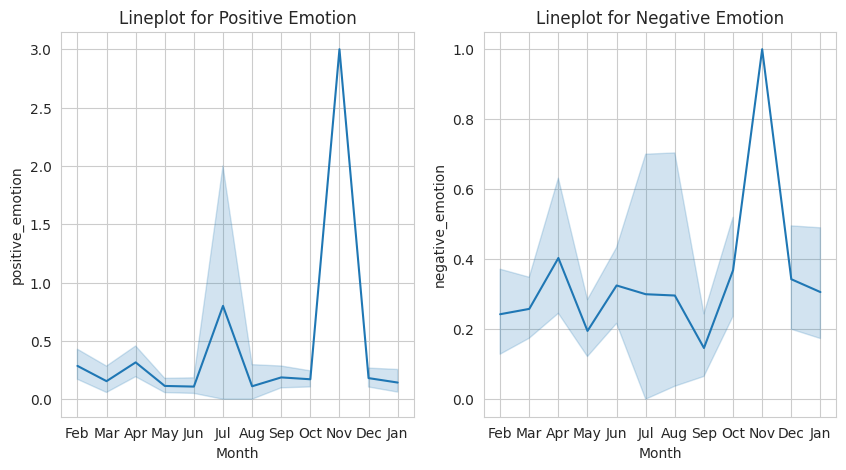

In [16]:
import empath
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt


#df = pd.read_csv('reddit_data.csv')
df1 = df1.loc[:,['Date','Text']]

lexicon = empath.Empath()
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,5))

def preprocess_data(df1):
    df1["Text"] = df1["Text"].apply(lambda x:x.translate(str.maketrans('','',string.punctuation)))
    df1["Date"] = pd.to_datetime(df1["Date"])
    df1["Month"] = df1['Date'].dt.strftime('%b')
    return df1

def sentiment(df1):
    positive_emotion = []
    negative_emotion = []
    for text in df1['Text']:
        scores = lexicon.analyze(text)
        positive_emotion.append(scores['positive_emotion'])
        negative_emotion.append(scores['negative_emotion'])

    df1['positive_emotion'] = positive_emotion
    df1['negative_emotion'] = negative_emotion

    # Initialize a DataFrame with all months
    all_months = pd.DataFrame({'Month': pd.date_range(start='2023-02-01', end='2024-01-31', freq='MS').strftime('%b')})

    # Merge sentiment data with all months
    df1 = all_months.merge(df1, on='Month', how='left')

    # Replace NaN values with 0
    df1['positive_emotion'] = df1['positive_emotion'].fillna(0)
    df1['negative_emotion'] = df1['negative_emotion'].fillna(0)

    sns.set_style('whitegrid')
    sns.lineplot(x='Month', y='positive_emotion', data=df1, ax=ax1)
    ax1.set_title("Lineplot for Positive Emotion")

    sns.set_style('whitegrid')
    sns.lineplot(x='Month', y='negative_emotion', data=df1, ax=ax2)
    ax2.set_title("Lineplot for Negative Emotion")

df1 =preprocess_data(df1)
sentiment(df1)

In [17]:
#df1['negative_emotion'].max()
df1['positive_emotion'].max()

8.0

In [18]:
df1.head()

,Date,Text,Month,positive_emotion,negative_emotion
0,2024-03-27 08:17:17,Its 12 of population\n\nAI will hit hard servi...,Mar,0.0,2.0
1,2024-03-27 09:44:03,Dont just take 8m jobs Take all of them Its ti...,Mar,0.0,0.0
2,2024-03-27 10:54:15,While this is a problem its a political proble...,Mar,0.0,0.0
3,2024-03-27 10:10:13,According to reconomics AI is nothing but a to...,Mar,0.0,2.0
4,2024-03-27 10:32:06,Only under capitalism would being free of labo...,Mar,0.0,1.0


In [ ]:
df1.head()

,Date,Text,Month,positive_emotion,negative_emotion
0,2023-04-14 18:28:50,Wasn’t OpenAI a startup that he started So eff...,Apr,0.0,0.0
1,2023-04-14 18:42:25,The world needs to pause AI development so I ...,Apr,0.0,0.0
2,2023-04-14 20:52:29,The more the merrier Nvidia is the winner in t...,Apr,0.0,0.0
3,2023-04-15 02:49:30,He has an agenda i dont agree with anymore He ...,Apr,0.0,0.0
4,2023-04-14 18:22:51,This person wanted 6 months of fair play to ca...,Apr,0.0,1.0


In [20]:
df1['positive_emotion'].unique()


array([0., 1., 2., 3., 8., 4., 6.])

In [21]:
df1['negative_emotion'].unique()

array([ 2.,  0.,  1.,  3.,  5., 10.,  8.])

# Topic Modeling

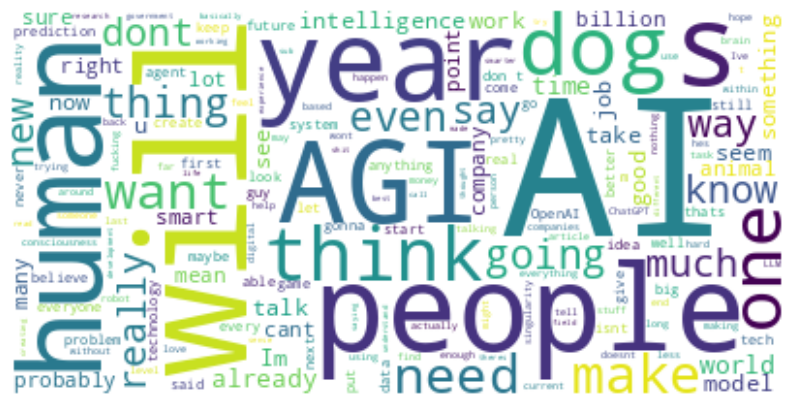

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
sw = STOPWORDS


text = ''.join(i for i in df1['Text'])
wc2 = WordCloud(stopwords=sw, background_color='white', max_words=300).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
from pprint import pprint

df2 = df1[['Text','positive_emotion', 'negative_emotion']]



In [ ]:
df2.head()

,Text,positive_emotion,negative_emotion
0,Wasn’t OpenAI a startup that he started So eff...,0.0,0.0
1,The world needs to pause AI development so I ...,0.0,0.0
2,The more the merrier Nvidia is the winner in t...,0.0,0.0
3,He has an agenda i dont agree with anymore He ...,0.0,0.0
4,This person wanted 6 months of fair play to ca...,0.0,1.0


In [ ]:
print("Positive headlines:\n")
pprint(list(df2[df2['positive_emotion'] > 5].Text)[:5], width=200)

print("Negative headlines:\n")
pprint(list(df2[df2['negative_emotion'] > 5].Text[:5]), width=200)

Positive headlines:

['I can hope that Ill win the lottery this week but Ill prepare for the possibility that I wont win it and will have to find the money to pay my bills this month\n'
 '\n'
 'I stopped reading the article when he said we can hope for better pay and better jobs What jobs Maybe we can hope for a better UBI payment each month',
 'Jesus almighty just go watch the Robert Miles youtube channel Watch the entirety of ithttpswwwyoutubecomRobertMilesAIvideos Right now So youll have the basic knowledge to begin to participate in '
 'this conversation\n'
 '\n'
 'There are a million problems that are fundamentally not tractable how can you trust in the magic genie that grants wishes How can you trust in the people who control the genie How can you wish for '
 'what you want and not what you think you want\n'
 '\n'
 'Your why cant you just shower thought doesnt work Dogs are pretty well aligned to people We love dogs and dogs love us\n'
 '\n'
 'They still maul a child to death on 

In [24]:
import re
df2['Text'] = df2['Text'].map(lambda x : re.sub('[,\.!?]', '', x))
df2['Text'] = df2['Text'].map(lambda x : x.lower())
df2.head()

<ipython-input-24-4c2ff98f420c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Text'] = df2['Text'].map(lambda x : re.sub('[,\.!?]', '', x))
<ipython-input-24-4c2ff98f420c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Text'] = df2['Text'].map(lambda x : x.lower())


,Text,positive_emotion,negative_emotion
0,its 12 of population\n\nai will hit hard servi...,0.0,2.0
1,dont just take 8m jobs take all of them its ti...,0.0,0.0
2,while this is a problem its a political proble...,0.0,0.0
3,according to reconomics ai is nothing but a to...,0.0,2.0
4,only under capitalism would being free of labo...,0.0,1.0


In [49]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
# Extend stopwords based on frequency of words on wordcloud
stop_words.extend(['will', 'hes','ive','thats','want','take','could','like','would','agi','dog','human', 'AGI', 'year', 'ai', 'will', 'dog', 'much', 'one', 'S', 'going', 'already', 'gonna', 'says', 'deleted', 'uk', 'go', 'lol', 'even', 'im', 'something', 'see'])

# Convert sentences to words
def sentence_to_words(sentences):
  for i in sentences:
    yield(simple_preprocess(str(i), deacc=True))

# Remove stopwords
def rm_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) if
  not word in stop_words] for doc in texts]

data = df2.Text.values.tolist()
data_words = list(sentence_to_words(data))

data_words = rm_stopwords(data_words)
print(data_words[:1][0][:30])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['population', 'hit', 'hard', 'service', 'based', 'economies']


In [50]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)

txt = data_words
corpus = [id2word.doc2bow(text) for text in txt]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       workers=2,
                                       passes=5,
                                       iterations=100)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.009*"years" + 0.007*"talk" + 0.007*"need" + 0.006*"make" + 0.005*"away" + '
  '0.005*"think" + 0.005*"everything" + 0.004*"first" + 0.003*"people" + '
  '0.003*"actually"'),
 (1,
  '0.009*"dont" + 0.008*"people" + 0.007*"consciousness" + 0.006*"years" + '
  '0.006*"brain" + 0.006*"know" + 0.005*"need" + 0.005*"smart" + 0.005*"world" '
  '+ 0.005*"jobs"'),
 (2,
  '0.008*"know" + 0.007*"people" + 0.007*"guy" + 0.007*"think" + 0.007*"world" '
  '+ 0.007*"us" + 0.005*"sure" + 0.005*"say" + 0.005*"dont" + 0.005*"time"'),
 (3,
  '0.011*"new" + 0.008*"people" + 0.007*"maybe" + 0.006*"dont" + 0.005*"think" '
  '+ 0.005*"well" + 0.005*"things" + 0.004*"intelligence" + 0.004*"years" + '
  '0.004*"time"'),
 (4,
  '0.010*"people" + 0.009*"intelligence" + 0.006*"artificial" + '
  '0.006*"company" + 0.006*"well" + 0.005*"really" + 0.005*"think" + '
  '0.005*"way" + 0.005*"good" + 0.005*"make"'),
 (5,
  '0.014*"years" + 0.009*"good" + 0.007*"dont" + 0.006*"work" + 0.006*"long" + '
  '0.006*

In [56]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.047490  0.012049       1        1  17.589716
7     -0.026924 -0.018368       2        1  13.492442
5     -0.047120  0.051003       3        1  10.040502
3     -0.041883  0.087824       4        1   9.831903
1     -0.046459 -0.092195       5        1   9.756930
4     -0.037545 -0.012273       6        1   8.575781
9      0.140533  0.067153       7        1   7.959822
0      0.035022 -0.012120       8        1   7.957717
2      0.075733 -0.099480       9        1   7.525961
8     -0.003867  0.016407      10        1   7.269224, topic_info=               Term       Freq      Total Category  logprob  loglift
127            good  34.000000  34.000000  Default  30.0000  30.0000
3859  consciousness  21.000000  21.000000  Default  29.0000  29.0000
426             new  40.000000  40.000000  Default  28.0000  28.0000
150           years  87.000000  87.000000  Default  27.0000  27.0000
61             know  55.000000  55.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
89            think   3.994137  80.166651  Topic10  -5.6831  -0.3778
13             cant   3.219351  29.173518  Topic10  -5.8988   0.4174
74              put   2.925438  16.974038  Topic10  -5.9945   0.8633
266            also   2.909817  44.821872  Topic10  -5.9999  -0.1131
953         smarter   2.900774  15.133372  Topic10  -6.0030   0.9696

[767 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
506       2  0.187054  abilities
506       4  0.187054  abilities
506       5  0.561162  abilities
1092      1  0.087028       able
1092      2  0.174056       able
...     ...       ...        ...
950       8  0.095479        yes
2682      4  0.336437       zero
2682      8  0.672874       zero
3475      7  0.674764     zombie
2473      6  0.901321       zuck

[1978 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 6, 4, 2, 5, 10, 1, 3, 9])